## K-NEAREST NEIGHBOURS

### Feature set

In [1]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime, timedelta 
from dateutil import parser

import warnings
warnings.filterwarnings("ignore")

In [2]:
mydateparser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
df_boston=pd.read_csv("Boston/boston_2015.csv", parse_dates=['start_time', "end_time"], date_parser=mydateparser)

In [3]:
df_boston = df_boston.drop(df_boston.index[21566])

In [4]:
df_weather=pd.read_csv("Boston/weather_hourly_boston.csv")

In [5]:
df_weather = df_weather.dropna()
df_weather.reset_index(drop=True, inplace=True)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43354 entries, 0 to 43353
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43354 non-null  object 
 1   max_temp   43354 non-null  float64
 2   min_temp   43354 non-null  float64
 3   precip     43354 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [6]:
df_weather["date_time"]=pd.to_datetime(df_weather["date_time"])

In [7]:
df_weather.sort_values("date_time",ignore_index=True, inplace=True,ascending=True)
df_weather

,date_time,max_temp,min_temp,precip
0,2015-01-01 06:00:00,-5.6,-5.6,0.0
1,2015-01-01 07:00:00,-5.6,-5.6,0.0
2,2015-01-01 08:00:00,-5.6,-5.6,0.0
3,2015-01-01 09:00:00,-4.4,-4.4,0.0
4,2015-01-01 10:00:00,-5.6,-5.6,0.0
...,...,...,...,...
43349,2020-01-02 01:00:00,3.3,3.3,0.0
43350,2020-01-02 02:00:00,3.3,3.3,0.0
43351,2020-01-02 03:00:00,2.8,2.8,0.0
43352,2020-01-02 04:00:00,2.8,2.8,0.0


In [8]:
only_2015=datetime.strptime("2016-01-01", "%Y-%m-%d")
only_2015

datetime.datetime(2016, 1, 1, 0, 0)

In [9]:
df_weather=df_weather[df_weather["date_time"]<only_2015]

In [10]:
df_boston=df_boston.drop(columns=["start_station_id", "end_station_id","start_station_name","end_station_name","bike_id","user_type","end_time"])

In [11]:
df_weather["mean_temp"]=(df_weather["max_temp"]+df_weather["min_temp"])/2

In [12]:
for x in range(len(df_weather)):
    mean=df_weather["mean_temp"][x]
    pre=df_weather["precip"][x]
    date1=df_weather["date_time"][x]
    df_boston.at[(df_boston["start_time"]>=date1) & (df_boston["start_time"]<date1+timedelta(hours=1)),"mean_temp"]=mean
    df_boston.at[(df_boston["start_time"]>=date1) & (df_boston["start_time"]<date1+timedelta(hours=1)),"precip"]=pre 

In [13]:
df_boston=df_boston.dropna()
df_boston.reset_index(drop=True, inplace=True)

In [14]:
df_boston["precip"]=df_boston["precip"].astype(int)
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056172 entries, 0 to 1056171
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   start_time  1056172 non-null  datetime64[ns]
 1   mean_temp   1056172 non-null  float64       
 2   precip      1056172 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 24.2 MB


In [15]:
df_boston['rushhour'] = df_boston['start_time'].apply(lambda x: 1 if (7<=x.hour<=9) or (16<=x.hour<=18)  else 0)

In [38]:
abc = {'1':3, '2':3, '3': 0, '4':0, '5':0, '6':1, '7':1, '8':1, '9':2, '10':2, '11':2, '12':3}
df_boston['season']=df_boston['start_time'].apply(lambda x: abc.get(str(x.month)))
df_boston[500000]


,start_time,mean_temp,precip,rushhour,season,spring,Weekday
0,2015-01-01 08:00:15,-5.6,0,1,3,0,1
1,2015-01-01 08:22:12,-5.6,0,1,3,0,1
2,2015-01-01 08:29:05,-5.6,0,1,3,0,1
3,2015-01-01 08:58:16,-5.6,0,1,3,0,1
4,2015-01-01 09:15:26,-4.4,0,1,3,0,1
...,...,...,...,...,...,...,...
1056167,2015-12-31 23:35:04,5.6,0,0,3,0,1
1056168,2015-12-31 23:37:29,5.6,0,0,3,0,1
1056169,2015-12-31 23:38:16,5.6,0,0,3,0,1
1056170,2015-12-31 23:46:04,5.6,0,0,3,0,1


In [43]:
df_boston.loc[500000]

start_time    2015-07-29 17:14:02
mean_temp                    29.4
precip                          0
rushhour                        1
season                          1
spring                          0
Weekday                         1
Name: 500000, dtype: object

In [44]:
def get_weekday (ts):
    return ts.weekday()
#0=Monday 6=Sunday
df_boston["Weekday"]=df_boston["start_time"].apply(lambda x:1 if 0<=get_weekday(x)<5 else 0)

In [45]:
df_boston

,start_time,mean_temp,precip,rushhour,season,spring,Weekday
0,2015-01-01 08:00:15,-5.6,0,1,3,0,1
1,2015-01-01 08:22:12,-5.6,0,1,3,0,1
2,2015-01-01 08:29:05,-5.6,0,1,3,0,1
3,2015-01-01 08:58:16,-5.6,0,1,3,0,1
4,2015-01-01 09:15:26,-4.4,0,1,3,0,1
...,...,...,...,...,...,...,...
1056167,2015-12-31 23:35:04,5.6,0,0,3,0,1
1056168,2015-12-31 23:37:29,5.6,0,0,3,0,1
1056169,2015-12-31 23:38:16,5.6,0,0,3,0,1
1056170,2015-12-31 23:46:04,5.6,0,0,3,0,1


In [77]:
df_boston['time'] = df_boston['start_time'].dt.time

In [85]:
pd.to_timedelta(df_boston['time']).dt.total_seconds()

ValueError: Invalid type for timedelta scalar: <class 'datetime.time'>

In [78]:
xp = df_boston["time"].values
yp = df_boston["mean_temp"].values

TypeError: float() argument must be a string or a number, not 'datetime.time'

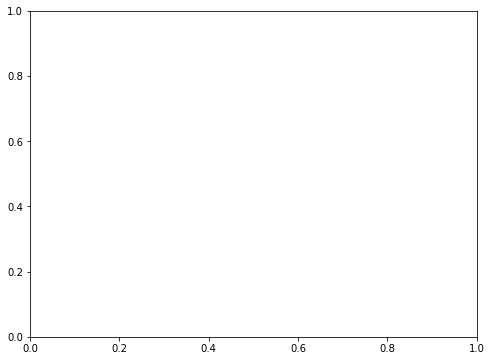

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(xp, yp, marker="x")
#plt.plot(np.arange(-18,40,1), KNN_reg.predict(np.arange(-18,40,1).reshape((-1,1))), marker="x", color='C1')
plt.xlabel("High Temperature (°C)")
plt.ylabel("Peak Demand (GW)")
plt.show()

In [60]:
x_train, x_test, y_train, y_test = train_test_split(xp, yp, test_size=0.3,random_state=10)

NameError: name 'train_test_split' is not defined

In [49]:
dict = {}
for i in range(24):
    df = df_boston[df_boston["start_time"].dt.hour == i]
    count = len(df)
    dict[str(i)] = count
  

In [55]:
dict
xp = np.array([])
for i in range(24):
    xp = np.append(xp, int(dict.get(str(i))))
xp

array([  8394.,   5287.,   3339.,   1053.,   1072.,   5460.,  22412.,
        60531.,  95654.,  56475.,  43207.,  48643.,  57128.,  56757.,
        57109.,  63930.,  87693., 122959.,  88939.,  62772.,  39504.,
        30107.,  23243.,  14504.])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xp, yp, test_size=0.3,random_state=10)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#Fit model
KNN_reg = KNeighborsRegressor(n_neighbors=25)
KNN_model = KNN_reg.fit(x_train.reshape((-1,1)), y_train) 

# Predict
y_hat_KNN = KNN_model.predict(x_test.reshape((-1,1)))

In [ ]:
print("Test set performance:")

print("MAE:",mean_absolute_error(y_hat_KNN, y_test), "GW")
print("RMSE:",(mean_squared_error(y_hat_KNN, y_test))**(0.5), "GW")  
#print("R2:",r2_score(y_hat_KNN, y_test))

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(x_train, y_train, marker="x")
plt.plot(np.arange(-18,40,1), KNN_reg.predict(np.arange(-18,40,1).reshape((-1,1))), marker="x", color='C1')
plt.xlabel("High Temperature (°C)")
plt.ylabel("Peak Demand (GW)")
plt.show()

In [ ]:
def find_knn (x,y,max_k):
    
    err_train = [] 
    err_test = []
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)

    for n in np.arange(1,max_k):

        # fit model
        KNN_reg = KNeighborsRegressor(n_neighbors=n)
        KNN_model = KNN_reg.fit(x_train.reshape((-1,1)), y_train)


        # compute errors
        err_train.append(mean_absolute_error(KNN_model.predict(x_train.reshape((-1,1))), y_train))
        err_test.append(mean_absolute_error(KNN_model.predict(x_test.reshape((-1,1))), y_test))
        
    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,max_k), err_train,np.arange(1,max_k), err_test)
    plt.legend(["Training", "Validation"])
    plt.xlabel("Number of neighbors")
    plt.ylabel("MAE")
    #plt.ylim((0,1))
    plt.show()

In [ ]:
xp = df_boston["High_temp"].values
yp = df_boston["MAX"].values